In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Dropout, LSTM, SimpleRNN
from keras.models import Model, Sequential
import pandas as pd
#import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split

In [2]:
def plot_y_yhat(x_test, y_test, model, title):
    y_hat = model.predict(x_test)
    Time_test = np.arange(0, len(y_hat))
    plt.figure(figsize=(12,6))
    plt.plot(Time_test, y_hat, 'b', Time_test, y_test, 'g')
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    plt.legend(['Predicted Prices', 'True Prices'], loc='upper right')
    plt.title('Labeled Vs Predicted Prices: ' + title)
    results = model.evaluate(x_test, y_test)
    print("test loss, test acc:", results)

In [3]:
stock = pd.read_csv(r'C:\Users\c3myb\OneDrive\Documents\Juypter Notebook HW Files\CPE 4903\RNN Stock Prediction\AAPL_hist_data.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/29/2022,176.690002,179.009995,176.339996,178.960007,177.882446,100589400
1,3/30/2022,178.550003,179.610001,176.699997,177.770004,176.699615,92633200
2,3/31/2022,177.839996,178.029999,174.399994,174.610001,173.558640,103049300
3,4/1/2022,174.029999,174.880005,171.940002,174.309998,173.260437,78751300
4,4/4/2022,174.570007,178.490005,174.440002,178.440002,177.365570,76468400


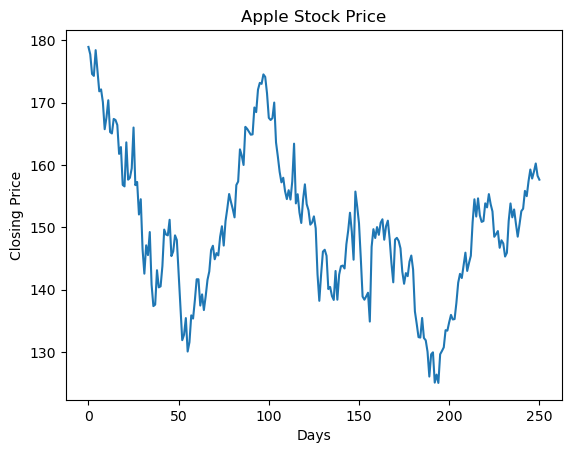

In [4]:
plt.plot(stock['Close'])
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.title('Apple Stock Price')
plt.show()

In [5]:
train_stock, test_stock = train_test_split(stock, test_size=0.2, shuffle=False)
X_train, Y_train = train_stock.drop(['Date','Adj Close','High', 'Low', 'Volume'], axis=1), train_stock['Close']
X_test, Y_test = test_stock.drop(['Date','Adj Close','High', 'Low', 'Volume'], axis=1), test_stock['Close']
X_train.head()

,Open,Close
0,176.690002,178.960007
1,178.550003,177.770004
2,177.839996,174.610001
3,174.029999,174.309998
4,174.570007,178.440002


In [6]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(200, 2) (200,)
(51, 2) (51,)


In [7]:
time_steps = 2
input_dim = 1
X_train = X_train.to_numpy()
X_train = np.reshape(X_train, (X_train.shape[0], time_steps, input_dim))

In [8]:
output_dim = 1
Y_train = Y_train.to_numpy()
Y_train = np.reshape(Y_train, (Y_train.shape[0], output_dim))

In [9]:
print(X_train.shape, Y_train.shape)

(200, 2, 1) (200, 1)


In [10]:
X_test = X_test.to_numpy()
X_test = np.reshape(X_test, (X_test.shape[0], time_steps, input_dim))

In [11]:
Y_test = Y_test.to_numpy()
Y_test = np.reshape(Y_test, (Y_test.shape[0], output_dim))

In [12]:
print(X_test.shape, Y_test.shape)

(51, 2, 1) (51, 1)


In [13]:
nx = 1
hidden_neurons = 64
model = Sequential()
model.add(SimpleRNN(units=hidden_neurons, input_shape=(time_steps, nx)))
model.add(Dense(units=640, activation='linear'))
model.add(Dense(units=320, activation='linear'))
model.add(Dense(units=320, activation='linear'))
model.add(Dense(units=1, activation='linear'))
opt=keras.optimizers.Adam()

model.compile(loss='mean_squared_error',optimizer=opt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 640)               41600     
                                                                 
 dense_1 (Dense)             (None, 320)               205120    
                                                                 
 dense_2 (Dense)             (None, 320)               102720    
                                                                 
 dense_3 (Dense)             (None, 1)                 321       
                                                                 
Total params: 353,985
Trainable params: 353,985
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(
    X_train, Y_train,
    epochs=150,
    batch_size=200,
    validation_split=0.2,
    verbose=1,
    shuffle=False
)

Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 23370.4941 - val_loss: 16702.0293
Epoch 2/150
1/1 [==============================] - 0s 25ms/step - loss: 20497.0234 - val_loss: 13935.1875
Epoch 3/150
1/1 [==============================] - 0s 27ms/step - loss: 17421.3223 - val_loss: 10645.5439
Epoch 4/150
1/1 [==============================] - 0s 25ms/step - loss: 13721.3545 - val_loss: 6851.7451
Epoch 5/150
1/1 [==============================] - 0s 24ms/step - loss: 9364.5059 - val_loss: 3028.2629
Epoch 6/150
1/1 [==============================] - 0s 25ms/step - loss: 4773.0303 - val_loss: 361.6648
Epoch 7/150
1/1 [==============================] - 0s 24ms/step - loss: 1081.1257 - val_loss: 970.7578
Epoch 8/150
1/1 [==============================] - 0s 25ms/step - loss: 400.7812 - val_loss: 5457.2944
Epoch 9/150
1/1 [==============================] - 0s 25ms/step - loss: 3696.2515 - val_loss: 7408.0640
Epoch 10/150
1/1 [==============================] - 0s 26ms/st

1/1 [==============================] - 0s 24ms/step - loss: 119.8925 - val_loss: 268.2704
Epoch 81/150
1/1 [==============================] - 0s 24ms/step - loss: 120.1974 - val_loss: 267.0995
Epoch 82/150
1/1 [==============================] - 0s 23ms/step - loss: 119.7464 - val_loss: 252.2093
Epoch 83/150
1/1 [==============================] - 0s 23ms/step - loss: 118.4956 - val_loss: 232.5350
Epoch 84/150
1/1 [==============================] - 0s 23ms/step - loss: 117.7548 - val_loss: 215.9872
Epoch 85/150
1/1 [==============================] - 0s 25ms/step - loss: 117.6951 - val_loss: 206.2767
Epoch 86/150
1/1 [==============================] - 0s 22ms/step - loss: 117.5099 - val_loss: 204.5040
Epoch 87/150
1/1 [==============================] - 0s 24ms/step - loss: 116.5772 - val_loss: 209.7954
Epoch 88/150
1/1 [==============================] - 0s 23ms/step - loss: 115.1097 - val_loss: 219.1342
Epoch 89/150
1/1 [==============================] - 0s 22ms/step - loss: 113.8205 - va

In [15]:
results = model.evaluate(X_test, Y_test)
print("test loss:", results)

2/2 [==============================] - 0s 3ms/step - loss: 5.3493
test loss: 5.349273204803467


In [16]:
stockpredict = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


2/2 [==============================] - 0s 2ms/step - loss: 5.3493
test loss, test acc: 5.349273204803467


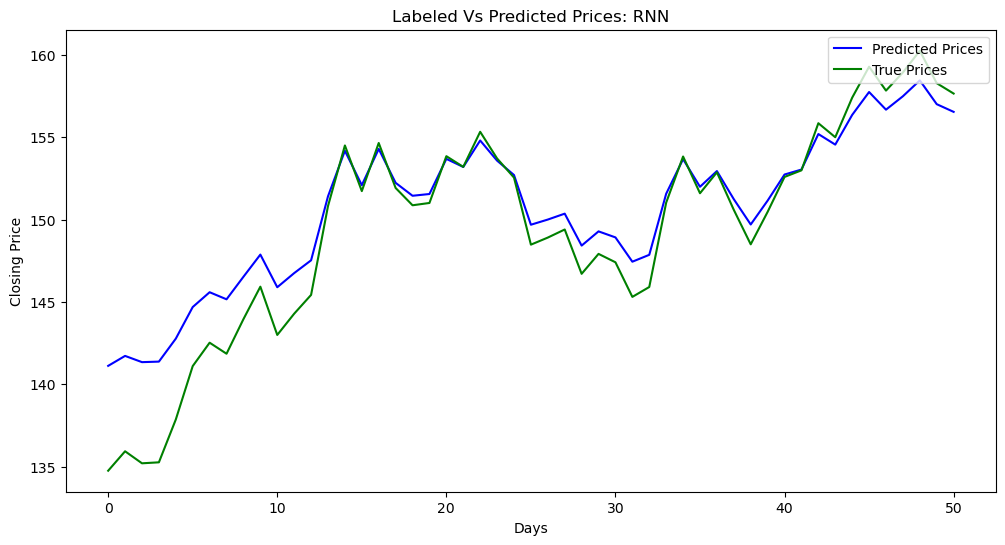

In [17]:
plot_y_yhat(X_test, Y_test, model, 'RNN')

The prediction error is 0.01%.


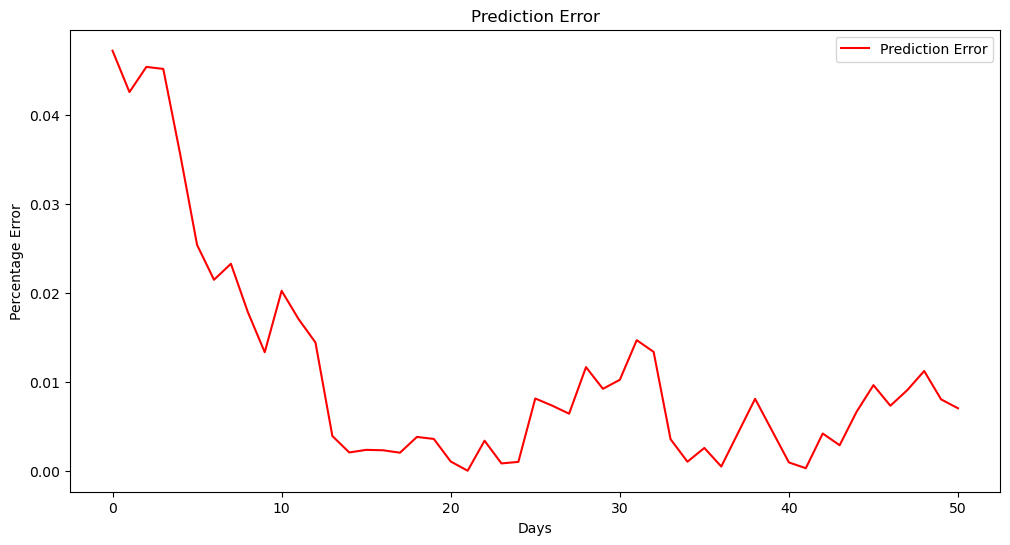

In [18]:
predictionError = np.abs(stockpredict - Y_test) / Y_test
percentError = np.mean(predictionError)
print("The prediction error is {:.2f}%.".format(percentError))

plt.figure(figsize=(12,6))
plt.plot(predictionError, 'r')
plt.title('Prediction Error')
plt.legend(["Prediction Error"])
plt.xlabel('Days')
plt.ylabel('Percentage Error')
plt.show()